<a href="https://colab.research.google.com/github/liangliang6v6/GraphCondensation/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Task 1 (20 points): Advanced Objective Function and Use Case
1. Derive the objective function for Logistic Regression using Maximum Likelihood
Estimation (MLE). Do some research on the MAP technique for Logistic Regression,
include your research on how this technique is different from MLE (include citations).
2. Define a machine learning problem you wish to solve using Logistic Regression. Justify
why logistic regression is the best choice and compare it briefly to another linear
classification model (cite your work if this other technique was not covered in class).
3. Discuss how your dataset corresponds to the variables in your equations, highlighting
any assumptions in your derivation from part 1.

### Derivation
Logistic regression assumes the probability of the positive class is given by the sigmoid function:
$$ P(y=1|x; \theta) = \frac{1}{1 + e^{-\theta^T x}} $$
where $\theta$ are the parameters to be estimated and $x$ is the feature vector.

Given $n$ independent observations $(x_i, y_i)$, the likelihood of the observed data is:
$$ L(\theta) = \prod_{i=1}^n P(y_i|x_i; \theta) $$
Substituting $P(y_i|x_i; \theta)$, the likelihood becomes:
$$ L(\theta) = \prod_{i=1}^n \left( \frac{1}{1 + e^{-\theta^T x_i}} \right)^{y_i} \left( 1 - \frac{1}{1 + e^{-\theta^T x_i}} \right)^{1-y_i} $$
Use the log format of Maximum Likelihood Estimation (MLE) to get the objective function:
$$
  \ell(\theta) = \sum_{i=1}^n \left[ y_i \log \sigma(\theta^T x_i) + (1 - y_i) \log (1 - \sigma(\theta^T x_i)) \right]
$$
where $\sigma(z) = \frac{1}{1 + e^{-z}}$, denotes as the sigmoid function.

Now, our target is to find the loss function to minimize. While maximizing the $\ell(\theta)$ is equivalent to minimize $-\ell(\theta)$. So the obejective function is:
$$
    \min_{\theta} -\ell(\theta) = - \sum_{i=1}^n \left[ y_i \log \sigma(\theta^T x_i) + (1 - y_i) \log (1 - \sigma(\theta^T x_i)) \right]
$$

### MAP Research
Maximum a Posteriori (MAP) estimation extends MLE by incorporating a prior distribution $ P(\theta) $ over the model parameters. The posterior is given by Bayes’ theorem[1][2]:
$$
P(\theta | D) \propto P(D | \theta) P(\theta)
$$
MAP maximizes the posterior probability $P(\theta | D)$, which combines the likelihood $P(D | \theta)$ and the prior $P(\theta)$. This results in the following objective function:

$$
J(\theta) = -\ell(\theta) - \log P(\theta)
$$

If we assume a Gaussian prior $P(\theta) \sim \mathcal{N}(0, \lambda^{-1} \mathbf{I})$, the prior contributes a regularization term:

$$
J(\theta) = -\ell(\theta) + \frac{\lambda}{2} \|\theta\|^2
$$

This formulation reduces overfitting by penalizing large parameter values, unlike Maximum Likelihood Estimation (MLE), which considers only the likelihood $P(D | \theta)$.

Difference Between MLE and MAP:  
- MLE considers only the likelihood $P(D | \theta)$ and may overfit the data.  
- MAP incorporates prior knowledge through $P(\theta)$, providing regularization and reducing overfitting.  

#### Reference
[1]. Bishop, C. M. *Pattern Recognition and Machine Learning*. Springer, 2006.  
[2]. Murphy, K. P. *Machine Learning: A Probabilistic Perspective*. MIT Press, 2012.

### Machine Learning Using LR
I want to use Logistic Regression to predict whether a patient is at risk of heart disease based on several medical features such as age, cholesterol levels, blood pressure, and maximum heart rate.

LR is suitable for this binary classification problem, where the goal is to classify each patient as either having heart disease (1) or not (0). It also provides coefficients that represent the contribution of each feature towards the likelihood of a patient having heart disease. This factor could help analyze the cause of heart disease.
If compared with the SVM liner model, LR could ve simpler with high efficiency. For the linear model could not capture the non-linear relation ship between input feature $x$ and prediction $y$.
### Datasets in Equation
The input feature $x=[x_1, x_2, ... x_n]$ could be the age, blood pressure and other data about the patient in the dataset. And $\theta=[\theta_1, \theta_2, ... \theta_n]$ are the coefficients in the model denotes as the influence of each feature.

The output is the probability that the patient has heart disease given the features, which can be used to classify the patient as either having the disease (1) or not (0).

##Task 2 (20 points): Dataset and Advanced EDA
1. Select a publicly available dataset (excluding commonly used datasets such as Titanic,
Housing Prices or Iris). Provide a link to your dataset. Ensure the dataset has at least 10
features to allow for more complex analysis.
2. Perform Exploratory Data Analysis (EDA), addressing potential multicollinearity among
features. Use Variance Inflation Factor (VIF) to identify highly correlated variables and
demonstrate steps to handle them.
3. Visualize the dataset's feature relationships, ensuring inclusion of at least two advanced
visualization techniques (e.g., pair plots with KDE, heatmaps with clustering).


### Dataset
[Financial Distress Prediction](https://www.kaggle.com/datasets/shebrahimi/financial-distress) dataset from Kaggle.com.


In [ ]:
import kagglehub
import pandas as pd

# Download latest version from kaggle
path = kagglehub.dataset_download("shebrahimi/financial-distress")

print("Path to dataset files:", path)
df = pd.read_csv(path+"/Financial Distress.csv")
df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/shebrahimi/financial-distress/versions/1


,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


### Perform Exploratory Data Analysis (EDA)

In [ ]:
# VIF check
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Financial Distress'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print("VIF values: \n", vif_data)

# remove related multicollinearity
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"].tolist()
df.drop(columns=high_vif_features, inplace=True, errors='ignore')

VIF values: 
     Feature       VIF
0   Company  1.278467
1        x9  2.365914
2       x10  2.358221
3       x12  1.386454
4       x15  1.022573
5       x18  1.935148
6       x20  2.036737
7       x22  1.245615
8       x27  1.011013
9       x28  1.151122
10      x31  1.364900
11      x36  2.556775
12      x39  1.040717
13      x40  1.593267
14      x41  1.519640
15      x42  1.083134
16      x43  1.384654
17      x45  1.689382
18      x47  1.015997
19      x53  2.822331
20      x54  1.688397
21      x55  1.386353
22      x56  1.324441
23      x57  1.005504
24      x58  1.053389
25      x60  1.291039
26      x80  1.098614
27      x82  1.868342
28      x83  1.804438


### Visualize Feature
- Pair Plots with KDE (Kernel Density Estimation)
- Heatmaps with Clustering

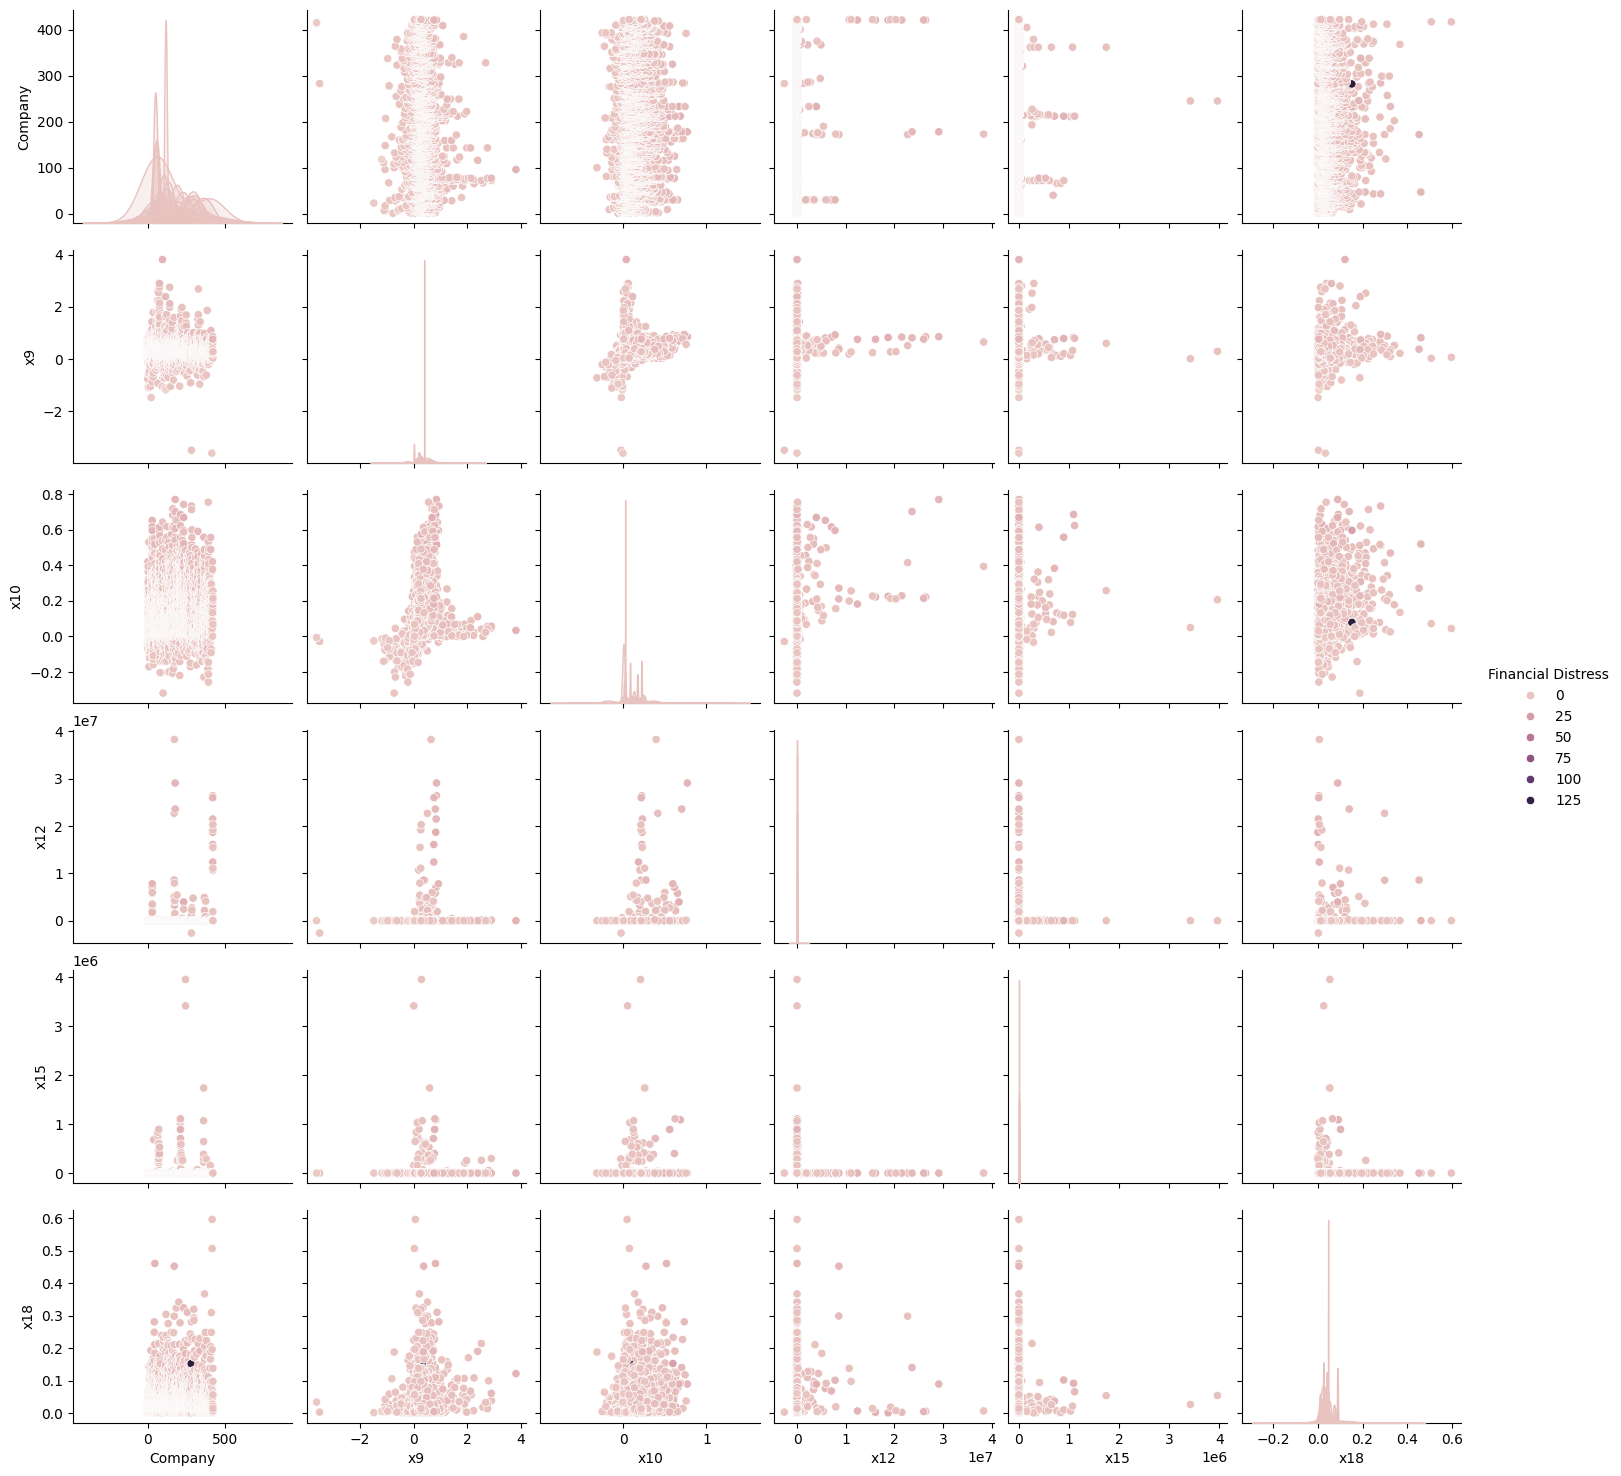

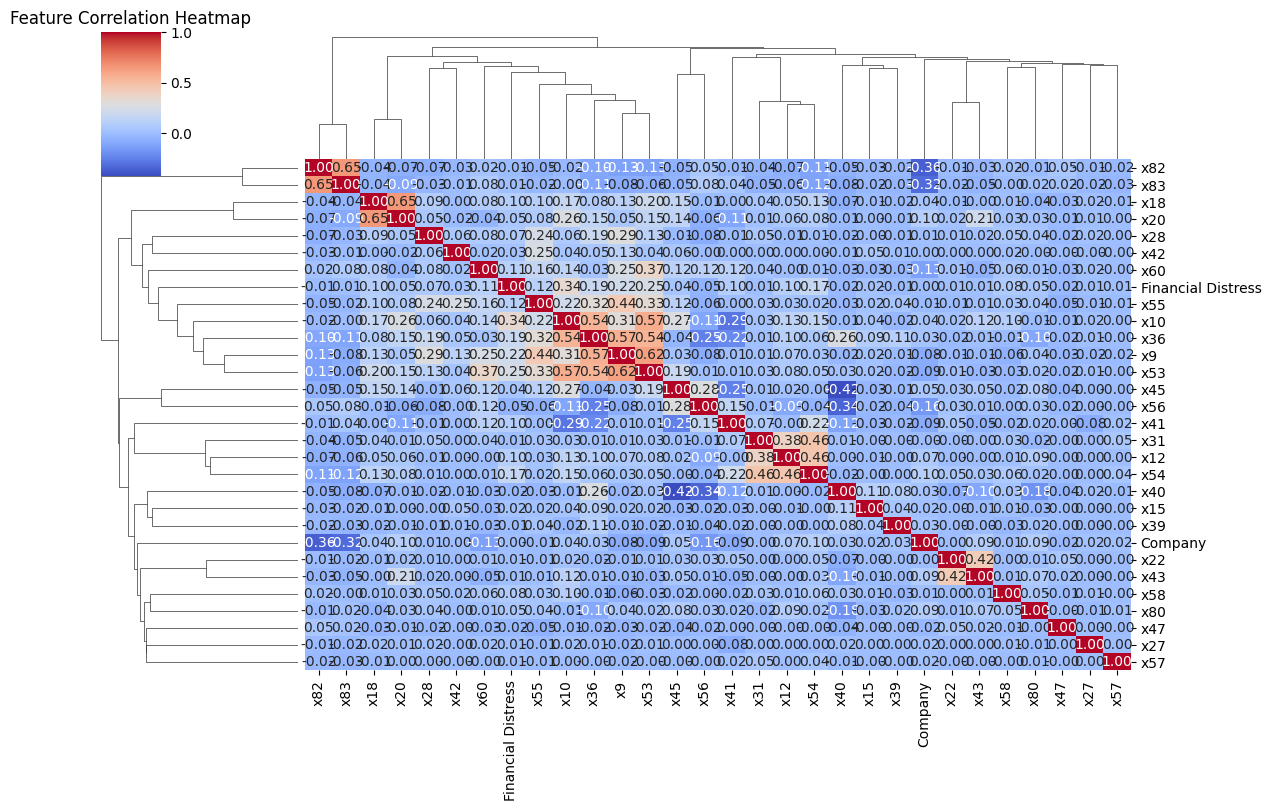

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

n = df.columns.tolist()
#total too long to run, select the first few
n1 = len(n)-23
# pair plot
selected_features = [n[i] for i in range(n1)]
sns.pairplot(df[selected_features], diag_kind='kde', hue="Financial Distress")
plt.show()
# heatmap with cluster
correlation_matrix = df.corr()
sns.clustermap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', figsize=(12, 8))
plt.title('Feature Correlation Heatmap')
plt.show()

##Task 3 (20 points): Logistic Regression Implementation
1. Implement Logistic Regression from scratch, including the vectorized implementation of cost function and gradient descent.
2. Implement and compare the three gradient descent variants (e.g., batch gradient descent, stochastic gradient descent, and mini-batch gradient descent). Explain their convergence properties with respect to your cost function.
(Refer to the research paper discussed in class; you may add additional research too).

1. The code is below combined with 2.
2. Batch gradient descent computes gradients using the entire dataset, offering stable but slow convergence, making it impractical for large datasets. stochastic gradient descent uses one example per update, leading to faster convergence but noisy updates, which can hinder stability. Mini-batch gradient descent strikes a balance by using small subsets of data, providing faster convergence than BGD and less noise than SGD, making it ideal for large datasets. So MBGD is the most practical and commonly used method due to its efficiency and reliable performance in both convex and non-convex cost functions.

In [22]:
# Logistic Regression
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, method="batch", batch_size=32):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.method = method
        self.batch_size = batch_size
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, X, y):
        m = len(y)
        h = self.sigmoid(np.dot(X, self.theta))
        cost = (-1/m) * (np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h)))
        return cost

    # Gradient descent
    def gradient_descent(self, X, y):
        m = len(y)
        for _ in range(self.epochs):
            h = self.sigmoid(np.dot(X, self.theta))
            gradient = (1 / m) * np.dot(X.T, (h - y))
            self.theta -= self.learning_rate * gradient
        return self

    # Stochastic Gradient Descent (SGD)
    def SGD(self, X, y):
        m = len(y)
        for _ in range(self.epochs):
            for i in range(m):
                # Choose a single sample at random
                xi = X[i, :].reshape(1, -1)
                yi = y[i]
                h = self.sigmoid(np.dot(xi, self.theta))
                gradient = (h - yi) * xi.flatten()
                self.theta -= self.learning_rate * gradient
        return self

    # Mini-batch Gradient Descent
    def mini_BGD(self, X, y):
        m = len(y)
        for _ in range(self.epochs):
            for i in range(0, m, self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]
                h = self.sigmoid(np.dot(X_batch, self.theta))
                gradient = (1/self.batch_size) * np.dot(X_batch.T, (h - y_batch))
                self.theta -= self.learning_rate * gradient
        return self

    def fit(self, X, y):
        m, n = X.shape
        X = np.concatenate([np.ones((m, 1)), X], axis=1)
        self.theta = np.zeros(n + 1)
        if self.method == 'batch':
            self.gradient_descent(X, y)
        elif self.method == 'SGD':
            self.SGD(X, y)
        elif self.method == 'mini-batch':
            self.mini_BGD(X, y)
        else:
            raise ValueError("Invalid method.")

    def predict(self, X):
        m = len(X)
        X = np.concatenate([np.ones((m, 1)), X], axis=1)
        probabilities = self.sigmoid(np.dot(X, self.theta))
        return (probabilities >= 0.5).astype(int)

if __name__ == "__main__":
    # 5 examples, 2 features
    X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
    y = np.array([0, 0, 1, 1, 1])

    methods = ["batch", "SGD", "mini-batch"]
    for method in methods:
      print("###Running methods:", method)
      model = LogisticRegression(learning_rate=0.1, epochs=1000, batch_size=2, method=method)
      model.fit(X, y)
      predictions = model.predict(X)
      print(f"Predictions: {predictions.flatten()}")
      print(f"Final Weights: {model.theta}")



###Running methods: batch
Predictions: [0 0 1 1 1]
Final Weights: [-4.48956181  3.40940167 -1.08016013]
###Running methods: SGD
Predictions: [0 0 1 1 1]
Final Weights: [-9.06351697  6.84539714 -2.21811984]
###Running methods: mini-batch
Predictions: [0 0 1 1 1]
Final Weights: [-6.91473449  5.23380938 -1.68092512]


##Task 4 (40 points): Optimization Techniques and Advanced Comparison
1. Implement or use packages to incorporate any three optimization algorithms (e.g.,
Momentum, RMSProp, Adam). Compare their performance with the vanilla stochastic
gradient descent implementation from Task 3.
2. Define and use multiple evaluation metrics (e.g., precision, recall, F1 score) to analyze
and interpret results for each algorithm.
3. Perform a hyperparameter tuning process (manual or automated using grid
search/random search) for each optimization algorithm and assess its impact on
performance. If you have to do some research for these techniques, please cite your
sources.
4. Conclude by discussing the practical trade-offs of the algorithms, including
computational complexity, interpretability, and suitability for large-scale datasets.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import precision_score, recall_score, f1_score

class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

def compute_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    return precision, recall, f1

# test data
train_data = TensorDataset(torch.rand(1000, 20), torch.randint(0, 2, (1000,)))
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

# Vanilla SGD
sgd_optimizer = optim.SGD(model.parameters(), lr=0.01)

# Momentum
momentum_optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# RMSProp
rmsprop_optimizer = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.9)

# Adam
adam_optimizer = optim.Adam(model.parameters(), lr=0.001)

def grid_search(optimizer_class, param_grid, train_loader, input_dim, hidden_dim, output_dim):
    best_params = None
    best_score = -1

    for params in param_grid:
        model = SimpleNN(input_dim, hidden_dim, output_dim)
        optimizer = optimizer_class(model.parameters(), **params)

        # Training procedure
        for epoch in range(epochs):
            for data, target in train_loader:
                optimizer.zero_grad()
                output = model(data)
                loss = nn.functional.cross_entropy(output, target)
                loss.backward()
                optimizer.step()

        # Evaluate the model
        y_true, y_pred = [], []
        with torch.no_grad():
            for data, target in train_loader:
                output = model(data)
                pred = output.argmax(dim=1, keepdim=True)
                y_true.extend(target.numpy())
                y_pred.extend(pred.numpy())

        precision, recall, f1 = compute_metrics(y_true, y_pred)
        if f1 > best_score:
            best_score = f1
            best_params = params

    return best_params, best_score

# Example grid for Adam
param_grid_adam = [{'lr': [0.001, 0.0001], 'betas': [(0.9, 0.999), (0.95, 0.999)]}]
best_params_adam, best_score_adam = grid_search(optim.Adam, param_grid_adam, train_loader, 20, 50, 2)
print("Best Adam parameters:", best_params_adam)

